In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [29]:
# Assuming 'vector_data' is a DataFrame where each row represents a vector at a specific time window

# Sample data preparation (Replace with actual vector data)
np.random.seed(42)
num_vectors = 1000
num_features = 10  # Number of features in each vector
vector_data = pd.DataFrame(np.random.randn(num_vectors, num_features), columns=[f'feature_{i}' for i in range(num_features)])
vector_data['target'] = np.random.choice([0, 1], size=(num_vectors,))  # Random target for example (0: Hold, 1: Buy/Sell)


In [30]:
# Feature Engineering: Creating lag features
for i in range(1, 4):  # Creating 3 lag features for each original feature
    for feature in vector_data.columns[:-1]:  # Exclude the target column
        vector_data[f'{feature}_lag_{i}'] = vector_data[feature].shift(i)

In [31]:
vector_data.dropna(inplace=True)  # Drop rows with NaN values resulting from lagging

In [34]:
# Train-Test Split
X = vector_data.drop('target', axis=1)
y = vector_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.53      0.50        95
           1       0.52      0.48      0.50       103

    accuracy                           0.50       198
   macro avg       0.50      0.50      0.50       198
weighted avg       0.50      0.50      0.50       198



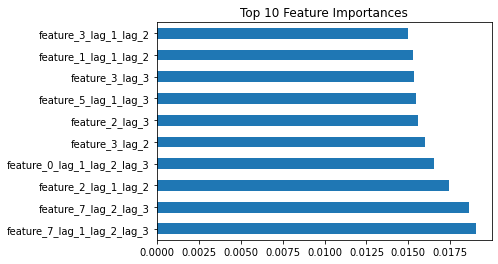

In [36]:
# Visualizing Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [37]:
# Implementing Trading Strategy Based on Model's Prediction
X['prediction'] = model.predict(X)
X['signal'] = X['prediction'].diff().fillna(0)  # Signal when there is a change in prediction

# Backtesting: Calculate returns and evaluate performance
initial_capital = 10000
X['portfolio_value'] = initial_capital * (1 + X['signal'] * X['feature_0'])  # Simplified; replace 'feature_0' with actual return calculation


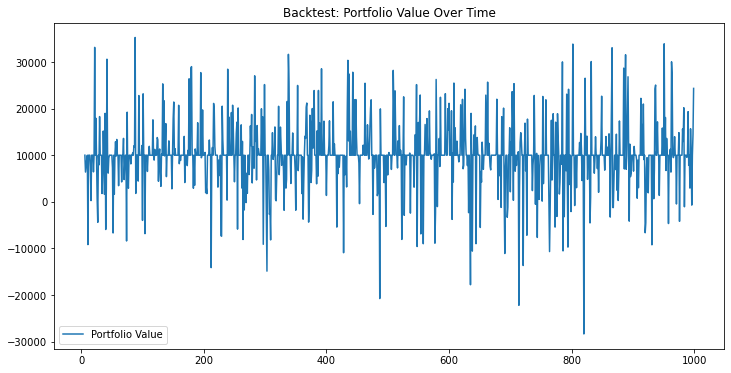

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(X.index, X['portfolio_value'], label='Portfolio Value')
plt.title('Backtest: Portfolio Value Over Time')
plt.legend()
plt.show()
